# Generalized Additive Models (GAMs)
### Non-Parametric Regression

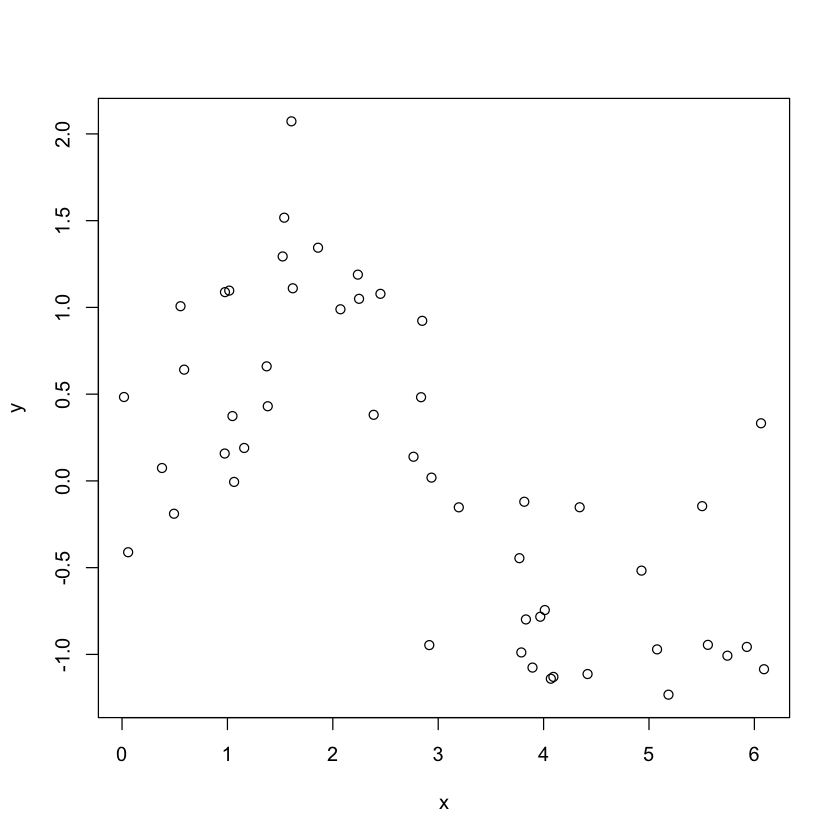

In [1]:
n <- 50
x <- runif(n, 0, 2*pi)
noise <- rnorm(n, sd=0.5)
y <- sin(x) + noise

plot(x, y)

In [2]:
knn <- function(x, y, window, f=mean) {
  y <- y[order(x)]
  x <- x[order(x)]
  n <- length(x)
  fit <- rep(NA, n)
  margin <- ceiling(window / 2)
  for (i in (margin + 1):(n - margin)) {
    value <- f(y[(i - margin):(i + margin)])
    fit[i] <- value
  }
  list(x=x, fit=fit)
}

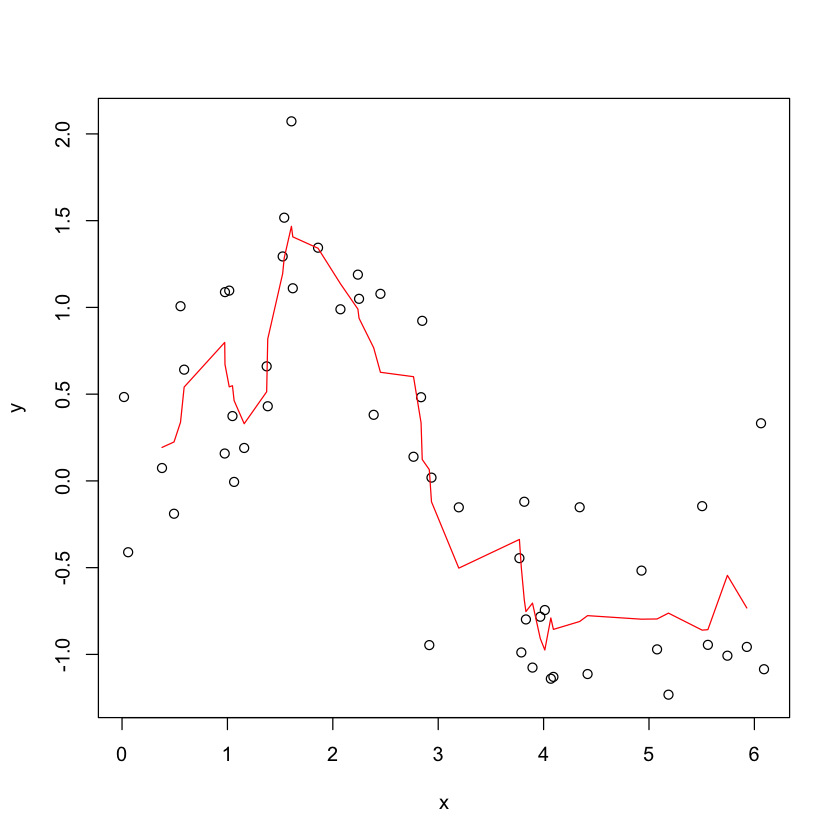

In [3]:
plot(x, y)
knn.fit <- knn(x, y, window=4)
lines(knn.fit$x, knn.fit$fit, col=2)

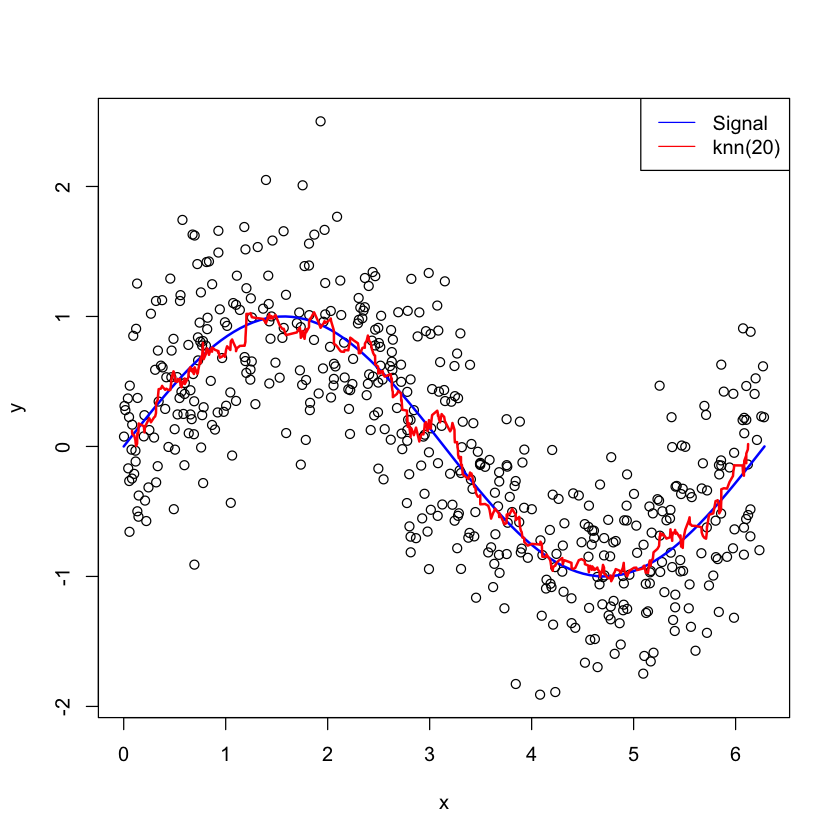

In [5]:
WINDOW <- 20 # try varying this value
NOISE <- 0.5 # ...and this

n <- 500
x <- runif(n, 0, 2*pi)
noise <- rnorm(n, sd=NOISE)
xv <- seq(0, 2*pi, length=100)
signal <- sin(xv)
y <- sin(x) + noise

plot(x, y)
knn.fit <- knn(x, y, window=WINDOW, f=mean)
lines(xv, signal, col=4, lw=2)
lines(knn.fit$x, knn.fit$fit, col=2, lw=2)
legend('topright', 
       lty=1, 
       col=c(4, 2), 
       legend=c('Signal', sprintf('knn(%d)', WINDOW)))

# More Sophisticated Methods
Pause to explain 
- Kernel Methods
- Splines

# GAMs in R

In [6]:
NOISE <- 0.5
N <- 100

x <- runif(N, 0, 2*pi)
noise <- rnorm(N, sd=NOISE)
y <- sin(x) + noise
df <- data.frame(x, y)
head(df)

x,y
5.2151163,-1.0035018
2.9537560,0.5675321
3.3291964,-0.2114120
0.6773561,1.1040817
4.6312285,-1.2396208
2.3781141,0.4729222


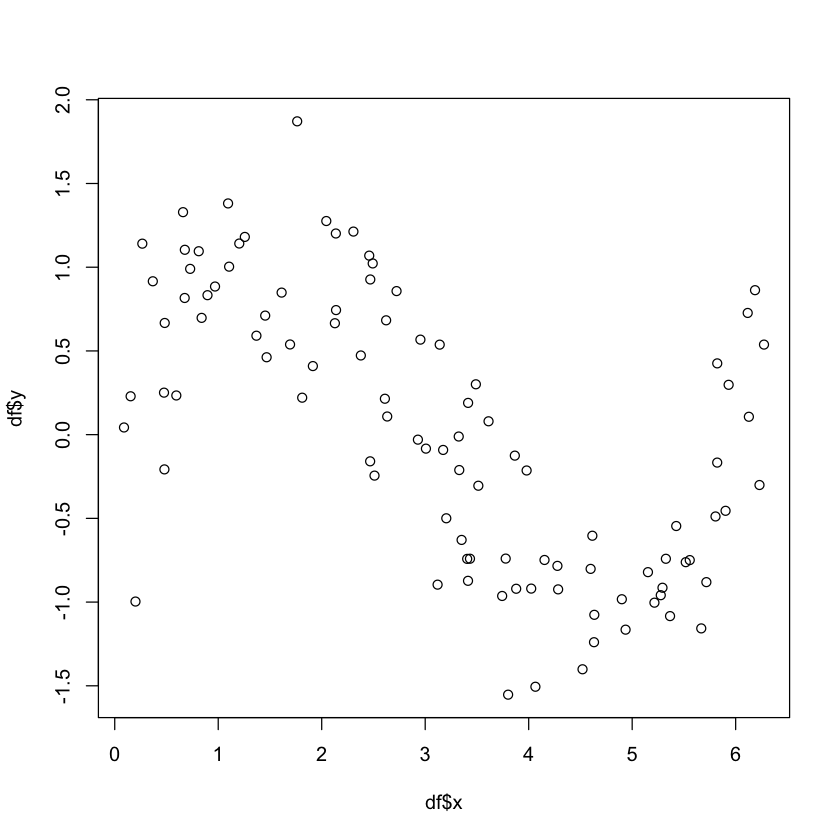

In [10]:
plot(df$x, df$y)

In [7]:
library(mgcv)

Loading required package: nlme
This is mgcv 1.8-24. For overview type 'help("mgcv-package")'.


In [8]:
gam.mod <- gam(y ~ s(x), data=df)
summary(gam.mod)


Family: gaussian 
Link function: identity 

Formula:
y ~ s(x)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.02261    0.04417   0.512     0.61

Approximate significance of smooth terms:
       edf Ref.df     F p-value    
s(x) 5.482  6.624 36.07  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.709   Deviance explained = 72.5%
GCV = 0.20861  Scale est. = 0.19509   n = 100

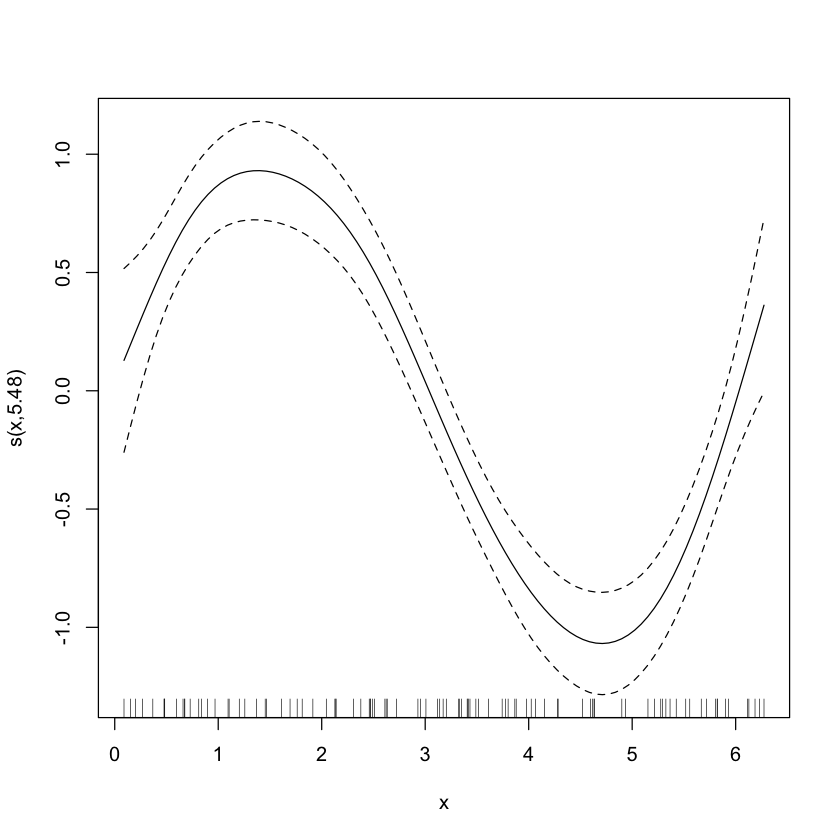

In [9]:
plot(gam.mod)


Family: gaussian 
Link function: identity 

Formula:
y ~ s(x, k = 80)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.02261    0.04424   0.511     0.61

Approximate significance of smooth terms:
      edf Ref.df     F p-value    
s(x) 5.54   6.92 34.24  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.708   Deviance explained = 72.4%
GCV = 0.20938  Scale est. = 0.19569   n = 100

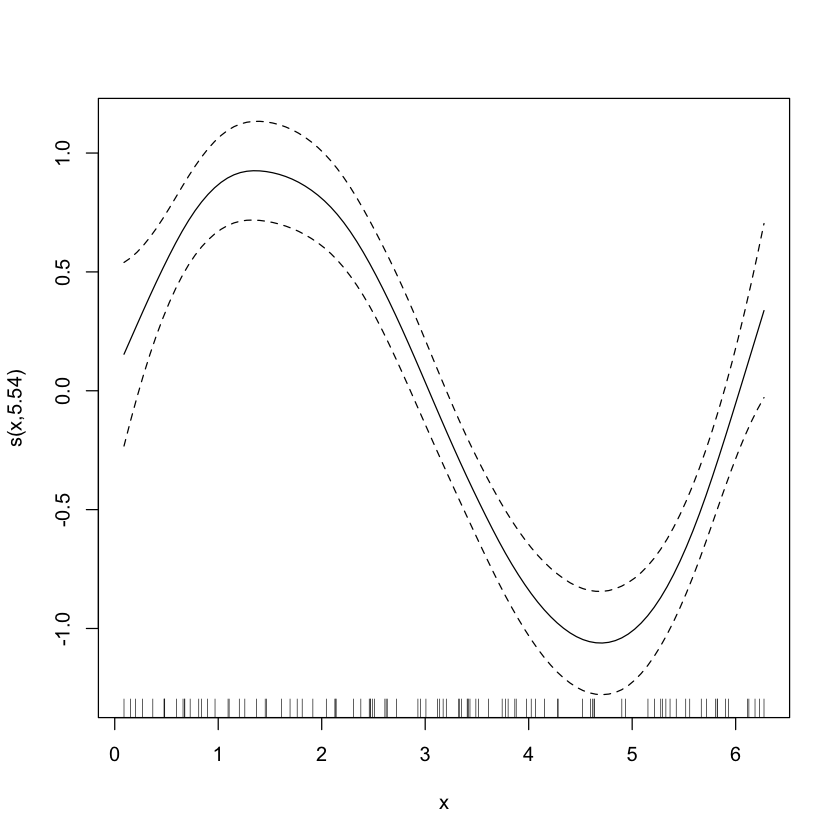

In [13]:
gam.mod <- gam(y ~ s(x, k=80), data=df)
summary(gam.mod)
plot(gam.mod)


Family: gaussian 
Link function: identity 

Formula:
y ~ s(x, k = 5)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.02261    0.04480   0.505    0.615

Approximate significance of smooth terms:
       edf Ref.df     F p-value    
s(x) 3.834  3.983 57.81  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.701   Deviance explained = 71.2%
GCV = 0.21086  Scale est. = 0.20067   n = 100

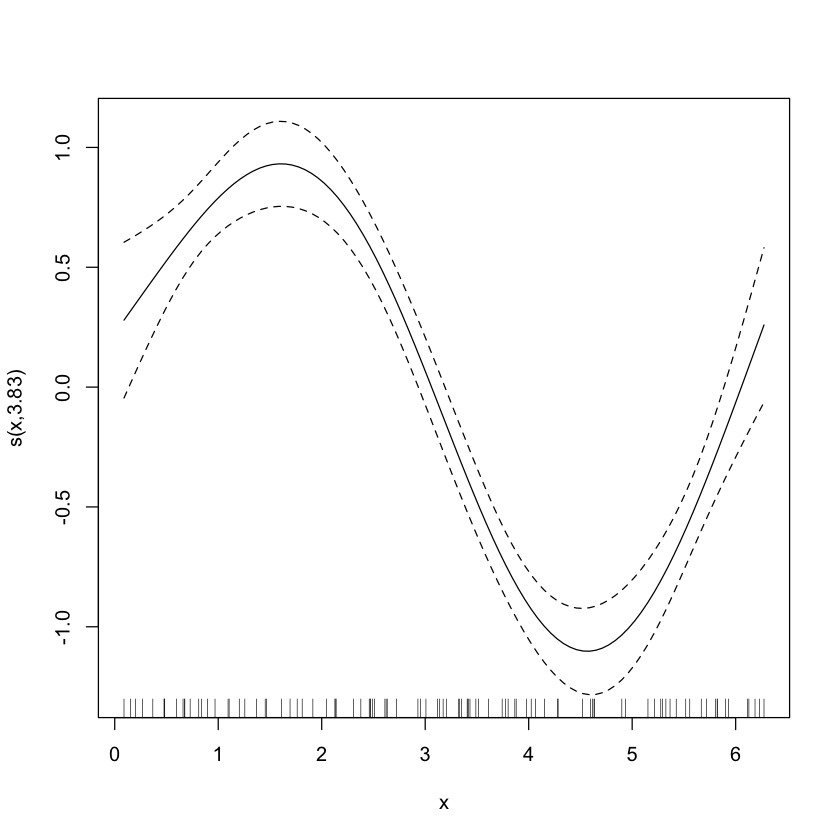

In [12]:
gam.mod <- gam(y ~ s(x, k=5), data=df)
summary(gam.mod)
plot(gam.mod)

# Pros and Cons

- Great for Exploring Possible Nonlinear Relationships - No Assumptions about the underlying data
- Computationally Expensive
- Eats up a lot of degrees of freedom

In [14]:
data(airquality)
head(airquality)
apply(airquality, 2, function(x) sum(is.na(x)))

Ozone,Solar.R,Wind,Temp,Month,Day
41,190,7.4,67,5,1
36,118,8.0,72,5,2
12,149,12.6,74,5,3
18,313,11.5,62,5,4
NA,NA,14.3,56,5,5
28,NA,14.9,66,5,6


Ozone Solar.R    Wind    Temp   Month     Day 
     37       7       0       0       0       0

In [15]:
airquality <- airquality[order(airquality$Temp),]
head(airquality)

,Ozone,Solar.R,Wind,Temp,Month,Day
5,NA,NA,14.3,56,5,5
18,6,78,18.4,57,5,18
25,NA,66,16.6,57,5,25
27,NA,NA,8.0,57,5,27
15,18,65,13.2,58,5,15
26,NA,266,14.9,58,5,26


In [16]:
for (field in c('Ozone', 'Solar.R')) {
  for (i in 1:nrow(airquality)) {
    if (is.na(airquality[i, field])) {
      airquality[i, field] <- mean(airquality[(i+1):(i+6), field], 
                                   na.rm=T)
    }
  }
}

head(airquality)

,Ozone,Solar.R,Wind,Temp,Month,Day
5,14.33333,114.80000,14.3,56,5,5
18,6.00000,78.00000,18.4,57,5,18
25,11.50000,66.00000,16.6,57,5,25
27,10.00000,80.33333,8.0,57,5,27
15,18.00000,65.00000,13.2,58,5,15
26,13.66667,266.00000,14.9,58,5,26


In [17]:
unique(airquality$Month)

[1] 5 9 6 8 7

In [19]:
gam.mod <- gam(
  Ozone ~ s(Solar.R) + s(Wind) + s(Temp) + s(Month, k=5),
  data=airquality)
summary(gam.mod)


Family: gaussian 
Link function: identity 

Formula:
Ozone ~ s(Solar.R) + s(Wind) + s(Temp) + s(Month, k = 5)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   42.187      1.378   30.62   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
             edf Ref.df      F  p-value    
s(Solar.R) 5.140  6.237  2.787   0.0121 *  
s(Wind)    2.621  3.324  8.503 1.73e-05 ***
s(Temp)    6.234  7.367 15.062 4.00e-16 ***
s(Month)   2.335  2.879  1.001   0.2922    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.707   Deviance explained = 73.9%
GCV = 327.52  Scale est. = 290.42    n = 153

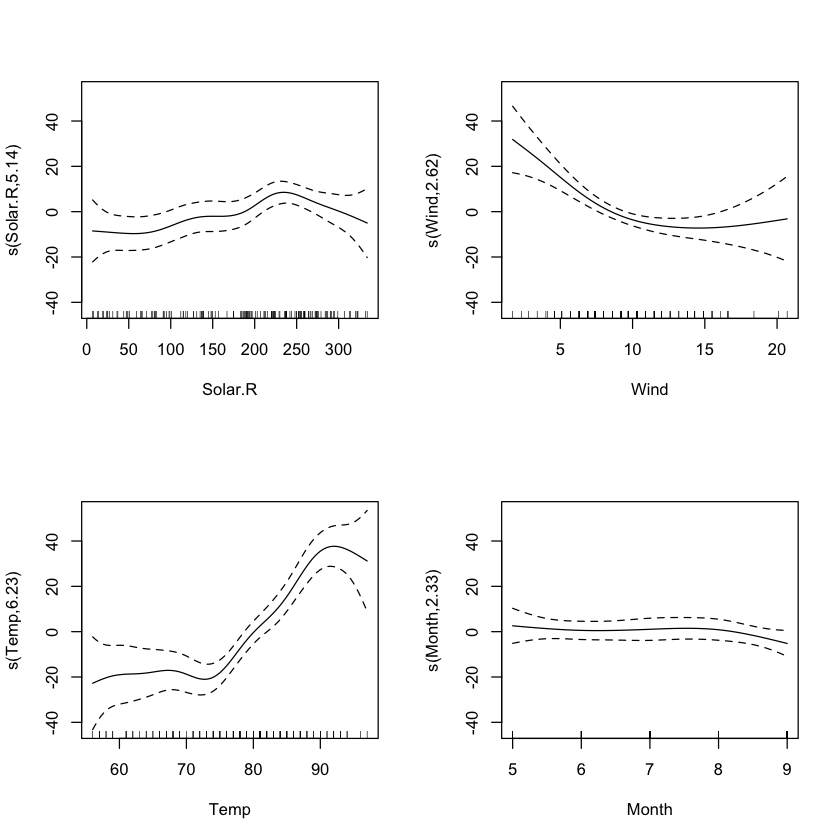

In [20]:
par(mfrow=c(2, 2))
plot(gam.mod)

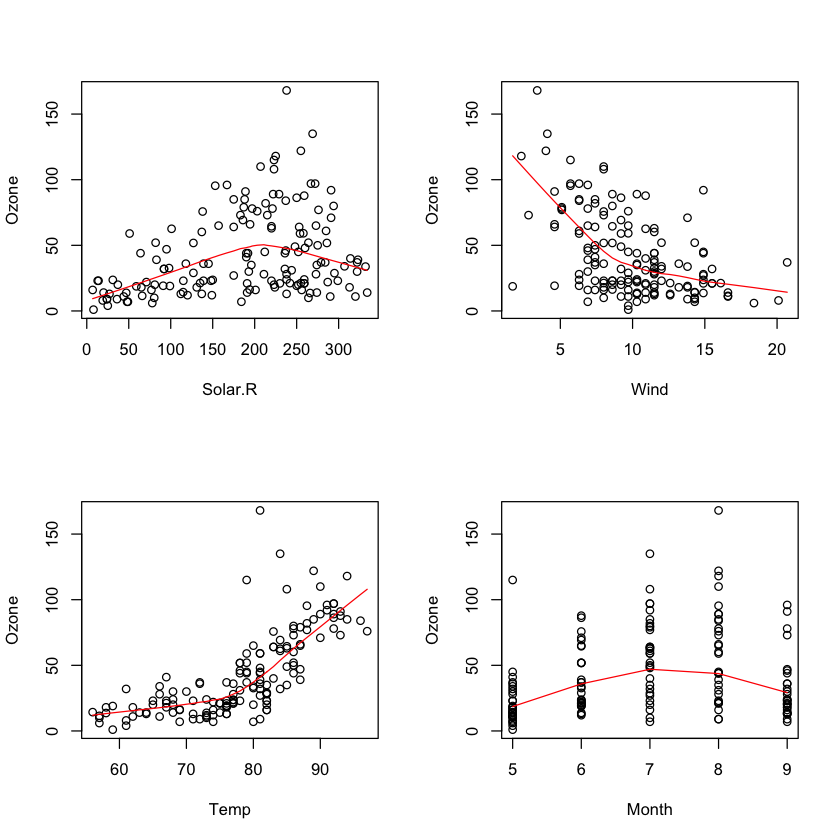

In [21]:
par(mfrow=c(2, 2))
for (field in c('Solar.R', 'Wind', 'Temp', 'Month')) {
  plot(airquality$Ozone ~ airquality[, field], xlab=field, ylab='Ozone')
  lines(lowess(airquality$Ozone ~ airquality[, field]), col=2)
}

In [22]:
gam.mod <- gam(
  Ozone ~ s(Solar.R) + s(Wind) + s(Temp) + s(Wind, Temp),
  data=airquality)
summary(gam.mod)


Family: gaussian 
Link function: identity 

Formula:
Ozone ~ s(Solar.R) + s(Wind) + s(Temp) + s(Wind, Temp)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   42.187      1.164   36.25   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                edf Ref.df     F  p-value    
s(Solar.R)    1.000  1.000 4.810  0.03027 *  
s(Wind)       2.044  2.796 0.166  0.93176    
s(Temp)       6.937  8.223 3.013  0.00353 ** 
s(Wind,Temp) 27.000 27.000 2.997 5.93e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.791   Deviance explained = 84.2%
GCV =  275.7  Scale est. = 207.26    n = 153

In [23]:
gam.mod <- gam(
  Ozone ~ s(Solar.R) + Wind + s(Temp) + s(Wind, Temp),
  data=airquality)
summary(gam.mod)


Family: gaussian 
Link function: identity 

Formula:
Ozone ~ s(Solar.R) + Wind + s(Temp) + s(Wind, Temp)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    5.925      1.315   4.505  1.5e-05 ***
Wind           3.642      0.172  21.167  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                edf Ref.df     F p-value    
s(Solar.R)    1.933  2.433 3.257  0.0303 *  
s(Temp)       8.675  8.761 0.825  0.5348    
s(Wind,Temp) 16.416 19.766 8.228  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Rank: 47/48
R-sq.(adj) =  0.756   Deviance explained =   80%
GCV = 296.22  Scale est. = 241.75    n = 153

In [24]:
gam.mod <- gam(
  Ozone ~ s(Solar.R) + Wind + Temp + s(Wind, Temp),
  data=airquality)
summary(gam.mod)


Family: gaussian 
Link function: identity 

Formula:
Ozone ~ s(Solar.R) + Wind + Temp + s(Wind, Temp)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.3960     0.8652  -0.458    0.648    
Wind         -1.1674     1.0191  -1.145    0.254    
Temp          0.6960     0.1351   5.152  9.5e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                edf Ref.df     F p-value    
s(Solar.R)    2.499  3.124 3.317  0.0221 *  
s(Wind,Temp) 20.723 25.142 5.297 4.6e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Rank: 39/41
R-sq.(adj) =  0.746   Deviance explained = 78.7%
GCV = 301.17  Scale est. = 251.63    n = 153

In [25]:
gam.mod <- gam(
  Ozone ~ s(Solar.R) + Wind + s(Wind, Temp),
  data=airquality)
summary(gam.mod)


Family: gaussian 
Link function: identity 

Formula:
Ozone ~ s(Solar.R) + Wind + s(Wind, Temp)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.0282     1.2072   4.993  1.9e-06 ***
Wind          3.6313     0.1654  21.956  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                edf Ref.df      F p-value    
s(Solar.R)    2.499  3.124  3.317  0.0221 *  
s(Wind,Temp) 21.557 25.976 24.333  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Rank: 39/40
R-sq.(adj) =  0.746   Deviance explained = 78.7%
GCV = 301.17  Scale est. = 251.63    n = 153

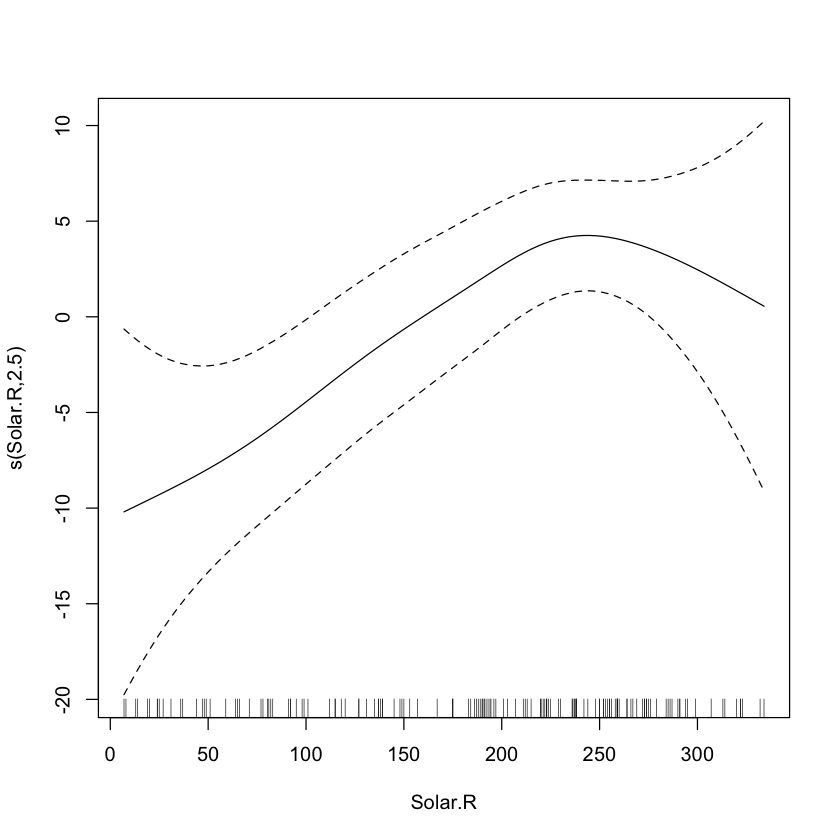

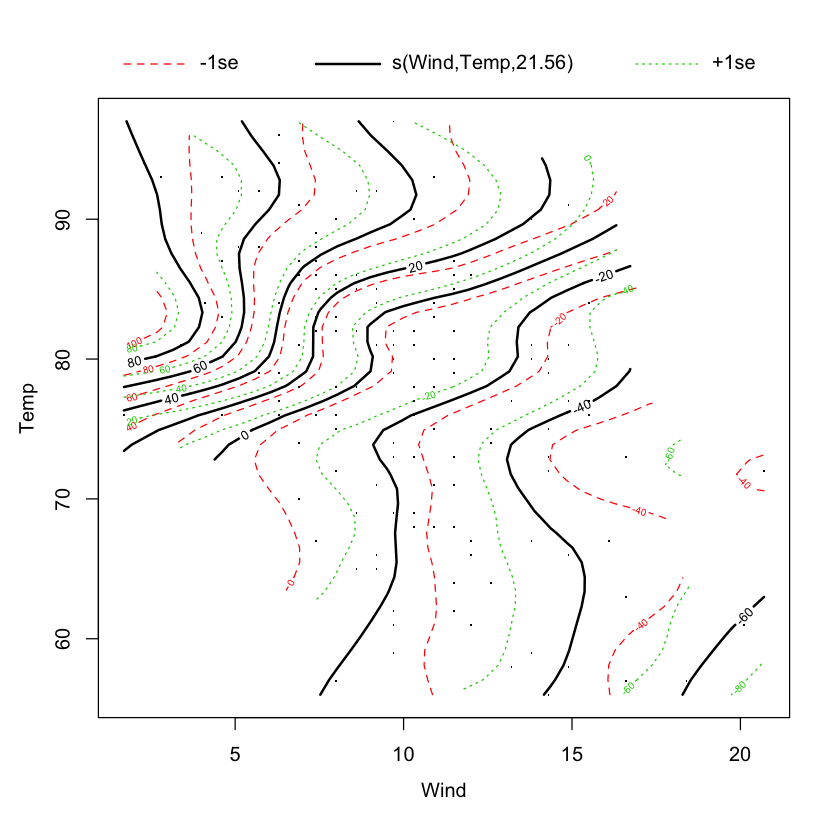

In [26]:
plot(gam.mod)

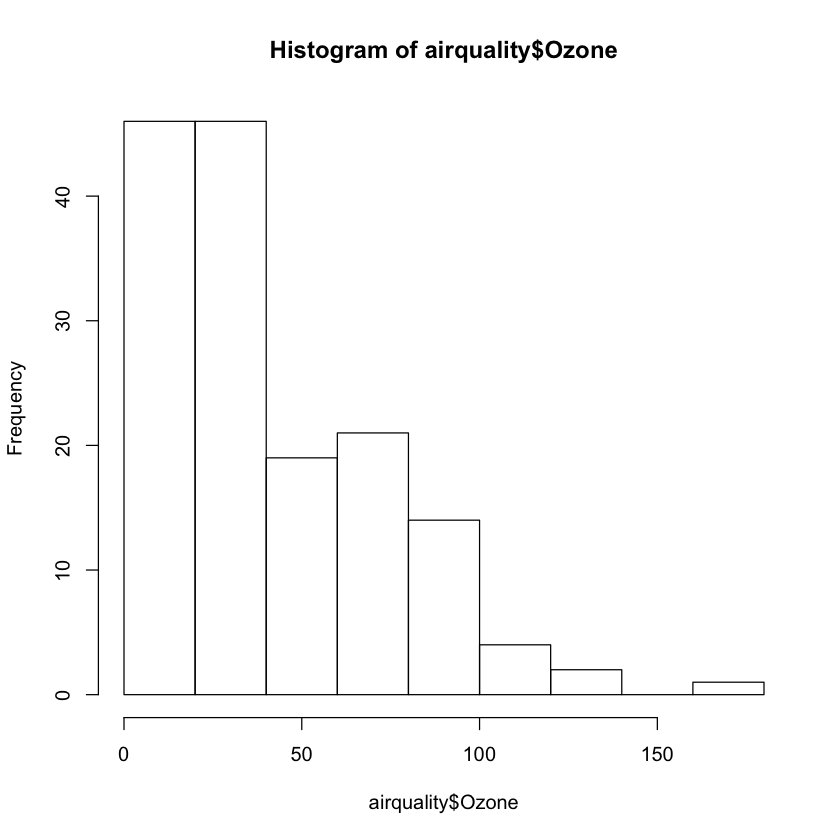

In [27]:
hist(airquality$Ozone)

In [28]:
gam.mod <- gam(
  Ozone ~ s(Solar.R) + s(Wind) + s(Temp) + s(Wind, Temp),
  family=Gamma(),
  data=airquality)
summary(gam.mod)


Family: Gamma 
Link function: inverse 

Formula:
Ozone ~ s(Solar.R) + s(Wind) + s(Temp) + s(Wind, Temp)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.03652    0.00127   28.77   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                edf Ref.df     F  p-value    
s(Solar.R)    3.402  4.251 3.676  0.00756 ** 
s(Wind)       1.000  1.000 0.060  0.80729    
s(Temp)       1.000  1.000 9.659  0.00233 ** 
s(Wind,Temp) 23.589 27.000 3.654 5.92e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =   0.81   Deviance explained = 77.8%
GCV = 0.2024  Scale est. = 0.13774   n = 153

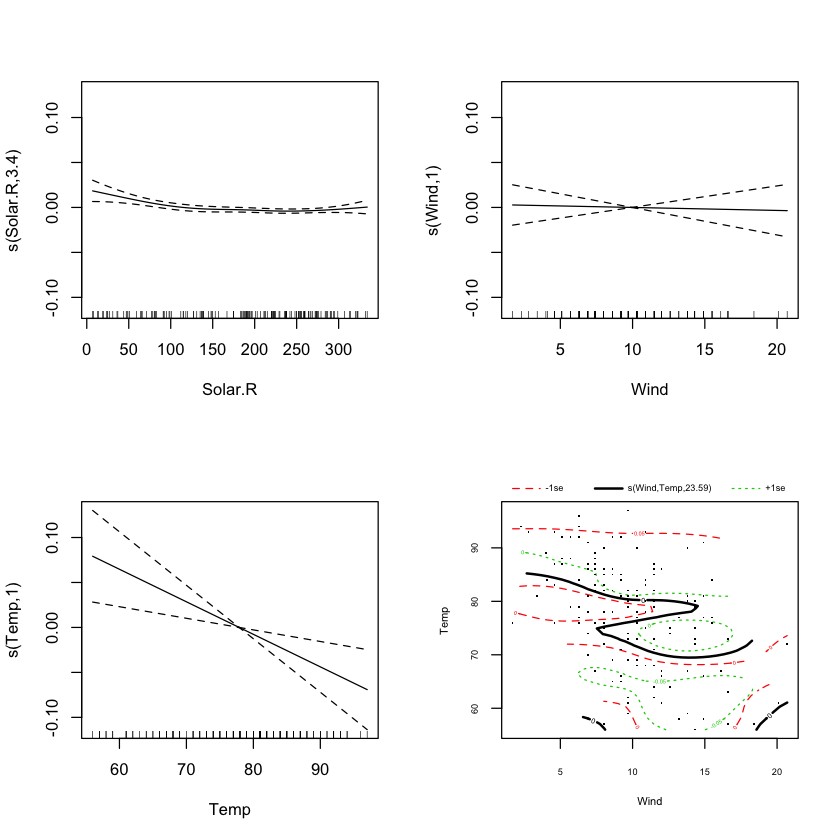

In [29]:
par(mfrow=c(2, 2))
plot(gam.mod)